<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week8/Day2/Exercises_Week8Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving titanic dataset.zip to titanic dataset.zip


In [3]:
import zipfile

with zipfile.ZipFile("titanic dataset.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")

In [4]:
import os

print(os.listdir("titanic_data"))

['titanic dataset']


In [8]:
import pandas as pd

df = pd.read_csv("titanic_data/titanic dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Initial number of rows
print("Original rows:", len(df))

# Duplicates
duplicates = df.duplicated()
print("Duplicate rows found:", duplicates.sum())

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Confirm removal
print("Rows after removing duplicates:", len(df_cleaned))

Original rows: 891
Duplicate rows found: 0
Rows after removing duplicates: 891


In [10]:
# Missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

<ipython-input-12-2344f61ca600>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)


In [13]:
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

<ipython-input-13-f76a7a9ffcd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)


In [14]:
df.drop(columns=['Cabin'], inplace=True)

In [16]:
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [17]:
# New feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# 4. Updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,True,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,False,False,True,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,False,False,True,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,True,False,True,False,True,False,False


In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Outliers
fare_outliers = detect_outliers_iqr(df, 'Fare')
age_outliers = detect_outliers_iqr(df, 'Age')

print(f"Fare outliers found: {len(fare_outliers)}")
print(f"Age outliers found: {len(age_outliers)}")

Fare outliers found: 116
Age outliers found: 66


In [20]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower, upper)

cap_outliers(df, 'Fare')
cap_outliers(df, 'Age')

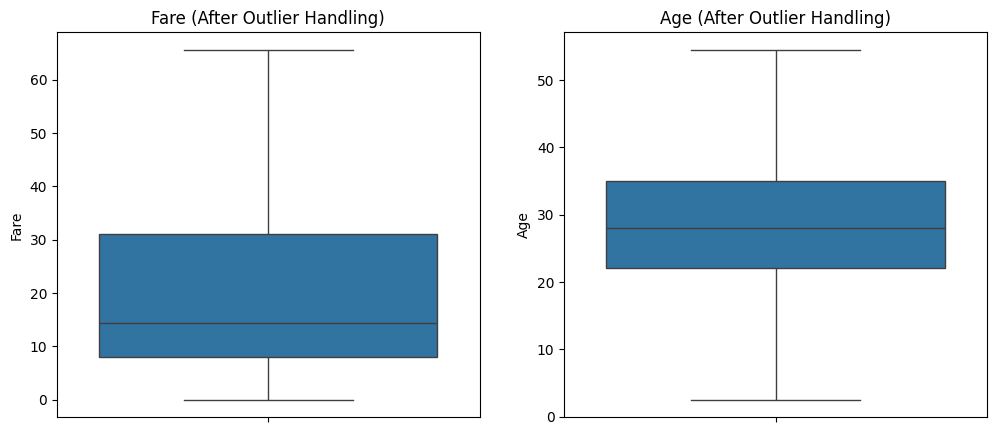

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df['Fare'], ax=axes[0])
axes[0].set_title("Fare (After Outlier Handling)")

sns.boxplot(df['Age'], ax=axes[1])
axes[1].set_title("Age (After Outlier Handling)")
plt.show()

In [22]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Copies of original DataFrame
df_standardized = df.copy()
df_normalized = df.copy()

# Scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# StandardScaler
df_standardized[num_cols] = std_scaler.fit_transform(df_standardized[num_cols])

# MinMaxScaler
df_normalized[num_cols] = minmax_scaler.fit_transform(df_normalized[num_cols])

In [24]:
print("Standardized Sample:")
print(df_standardized[num_cols].head())

print("\nNormalized Sample:")
print(df_normalized[num_cols].head())

Standardized Sample:
        Age      Fare     SibSp     Parch  FamilySize
0 -0.583432 -0.820552  0.432793 -0.473674    0.059160
1  0.742685  2.031623  0.432793 -0.473674    0.059160
2 -0.251903 -0.787578 -0.474545 -0.473674   -0.560975
3  0.494038  1.419297  0.432793 -0.473674    0.059160
4  0.494038 -0.781471 -0.474545 -0.473674   -0.560975

Normalized Sample:
        Age      Fare  SibSp  Parch  FamilySize
0  0.375000  0.110460  0.125    0.0         0.1
1  0.682692  1.000000  0.125    0.0         0.1
2  0.451923  0.120745  0.000    0.0         0.0
3  0.625000  0.809027  0.125    0.0         0.1
4  0.625000  0.122649  0.000    0.0         0.0


In [26]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


In [27]:
df[['Sex_male', 'Embarked_Q', 'Embarked_S']].head()

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True


In [28]:
df_encoded = pd.get_dummies(df, columns=['Sex_male', 'Embarked_Q', 'Embarked_S'], drop_first=True)

In [29]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_male_True,Embarked_Q_True,Embarked_S_True
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,False,True,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,65.6344,2,False,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,True,False,False,True,False,True


In [31]:
# Ex 7

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

In [32]:
df_encoded = pd.get_dummies(df_encoded, columns=['AgeGroup'], drop_first=False)

In [33]:
 df_encoded[['Age', 'AgeGroup_Child', 'AgeGroup_Teen', 'AgeGroup_Young Adult', 'AgeGroup_Adult', 'AgeGroup_Senior']].head(10)

,Age,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,22.0,False,False,True,False,False
1,38.0,False,False,False,True,False
2,26.0,False,False,True,False,False
3,35.0,False,False,True,False,False
4,35.0,False,False,True,False,False
5,28.0,False,False,True,False,False
6,54.0,False,False,False,True,False
7,2.5,True,False,False,False,False
8,27.0,False,False,True,False,False
9,14.0,False,True,False,False,False
